In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
pd.set_option('display.max_rows', None)

In [5]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
df.shape

(1460, 81)

In [7]:
df.drop(['Id'], axis = 1, inplace = True)

In [8]:
#dropping columns if na percent is greater than 50
for feature in df.columns:
    na_percent = np.rint((df[feature].isnull().sum()/len(df))*100)
    if na_percent > 50:
        df.drop([feature], axis = 1, inplace = True)

In [9]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

In [10]:
df.shape

(1460, 76)

In [11]:
num_features = df.select_dtypes(exclude = ['object']).copy().columns
cat_features = df.select_dtypes(include = ['object']).copy().columns

In [12]:
len(num_features)+len(cat_features)

76

In [13]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [15]:
for feature in num_features:
    df[feature] = df[feature].fillna(np.rint(df[feature].mean()))

In [16]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,70.0,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [17]:
df['FireplaceQu']

0       NaN
1        TA
2        TA
3        Gd
4        TA
5       NaN
6        Gd
7        TA
8        TA
9        TA
10      NaN
11       Gd
12      NaN
13       Gd
14       Fa
15      NaN
16       TA
17      NaN
18      NaN
19      NaN
20       Gd
21       Gd
22       Gd
23       TA
24       TA
25       Gd
26      NaN
27       Gd
28       Gd
29      NaN
30      NaN
31      NaN
32      NaN
33       Gd
34       Gd
35       Gd
36      NaN
37       TA
38      NaN
39      NaN
40       TA
41       Gd
42      NaN
43      NaN
44      NaN
45       Gd
46       Ex
47      NaN
48      NaN
49      NaN
50      NaN
51       Gd
52      NaN
53       Gd
54       TA
55       Gd
56      NaN
57      NaN
58       Gd
59      NaN
60      NaN
61      NaN
62       Gd
63      NaN
64      NaN
65       Gd
66       Gd
67      NaN
68      NaN
69       TA
70       Gd
71      NaN
72       TA
73      NaN
74      NaN
75      NaN
76      NaN
77      NaN
78      NaN
79      NaN
80       Gd
81      NaN
82       Gd
83  

In [18]:
for feature in cat_features:
    df[feature] = df[feature].fillna(df[feature].mode()[0])

In [19]:
df['FireplaceQu']

0       Gd
1       TA
2       TA
3       Gd
4       TA
5       Gd
6       Gd
7       TA
8       TA
9       TA
10      Gd
11      Gd
12      Gd
13      Gd
14      Fa
15      Gd
16      TA
17      Gd
18      Gd
19      Gd
20      Gd
21      Gd
22      Gd
23      TA
24      TA
25      Gd
26      Gd
27      Gd
28      Gd
29      Gd
30      Gd
31      Gd
32      Gd
33      Gd
34      Gd
35      Gd
36      Gd
37      TA
38      Gd
39      Gd
40      TA
41      Gd
42      Gd
43      Gd
44      Gd
45      Gd
46      Ex
47      Gd
48      Gd
49      Gd
50      Gd
51      Gd
52      Gd
53      Gd
54      TA
55      Gd
56      Gd
57      Gd
58      Gd
59      Gd
60      Gd
61      Gd
62      Gd
63      Gd
64      Gd
65      Gd
66      Gd
67      Gd
68      Gd
69      TA
70      Gd
71      Gd
72      TA
73      Gd
74      Gd
75      Gd
76      Gd
77      Gd
78      Gd
79      Gd
80      Gd
81      Gd
82      Gd
83      Gd
84      TA
85      TA
86      Gd
87      Gd
88      Gd
89      Gd
90      Gd

In [20]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

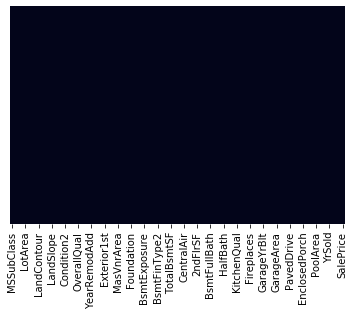

In [21]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)

In [22]:
df1 = df.copy()

In [23]:
df1.rename(columns = {'3SsnPorch':'SsnPorch','1stFlrSF':'FirstFlrSF','2ndFlrSF':'SecFlrSF'}, inplace = True)

In [24]:
for feature in df1.columns:
    if feature[0].isdigit():
        print(feature)

In [25]:
import statsmodels.formula.api as smf

In [26]:
formula_str = df1.columns[-1]+' ~ '+'+'.join(df1.columns[:-1])

In [27]:
formula_str

'SalePrice ~ MSSubClass+MSZoning+LotFrontage+LotArea+Street+LotShape+LandContour+Utilities+LotConfig+LandSlope+Neighborhood+Condition1+Condition2+BldgType+HouseStyle+OverallQual+OverallCond+YearBuilt+YearRemodAdd+RoofStyle+RoofMatl+Exterior1st+Exterior2nd+MasVnrType+MasVnrArea+ExterQual+ExterCond+Foundation+BsmtQual+BsmtCond+BsmtExposure+BsmtFinType1+BsmtFinSF1+BsmtFinType2+BsmtFinSF2+BsmtUnfSF+TotalBsmtSF+Heating+HeatingQC+CentralAir+Electrical+FirstFlrSF+SecFlrSF+LowQualFinSF+GrLivArea+BsmtFullBath+BsmtHalfBath+FullBath+HalfBath+BedroomAbvGr+KitchenAbvGr+KitchenQual+TotRmsAbvGrd+Functional+Fireplaces+FireplaceQu+GarageType+GarageYrBlt+GarageFinish+GarageCars+GarageArea+GarageQual+GarageCond+PavedDrive+WoodDeckSF+OpenPorchSF+EnclosedPorch+SsnPorch+ScreenPorch+PoolArea+MiscVal+MoSold+YrSold+SaleType+SaleCondition'

In [28]:
model = smf.ols(formula = formula_str, data = df1)

In [29]:
fitted = model.fit()

In [30]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     70.55
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:41:54   Log-Likelihood:                -16597.
No. Observations:                1460   AIC:                         3.366e+04
Df Residuals:                    1226   BIC:                         3.490e+04
Df Model:                         233                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [31]:
test_df = pd.read_csv('test.csv')

In [32]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [33]:
test_df1 = test_df.copy()

In [34]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [35]:
test_df1.drop(['Id','Alley','PoolQC','Fence','MiscFeature'], axis = 1, inplace = True)

In [36]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non-null object
MasVnrType       1443 no

In [37]:
test_df1.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath     

In [38]:
num_features_test = test_df1.select_dtypes(exclude = ['object']).copy().columns
cat_features_test = test_df1.select_dtypes(include = ['object']).copy().columns

In [39]:
for feature in num_features_test:
    test_df1[feature] = test_df1[feature].fillna(np.rint(test_df1[feature].mean()))

In [40]:
for feature in cat_features_test:
    test_df1[feature] = test_df1[feature].fillna(test_df1[feature].mode()[0])

In [41]:
test_df1.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [42]:
train_df = df.copy()

In [43]:
train_df.shape

(1460, 76)

In [44]:
test_df1.shape

(1459, 75)

In [45]:
final_df = pd.concat([train_df,test_df1], axis = 0)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [46]:
final_df.shape

(2919, 76)

In [47]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
17       90000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
30       40000.0
31      149350.0
32      179900.0
33      165500.0
34      277500.0
35      309000.0
36      145000.0
37      153000.0
38      109000.0
39       82000.0
40      160000.0
41      170000.0
42      144000.0
43      130250.0
44      141000.0
45      319900.0
46      239686.0
47      249700.0
48      113000.0
49      127000.0
50      177000.0
51      114500.0
52      110000.0
53      385000.0
54      130000.0
55      180500.0
56      172500.0
57      196500.0
58      438780

In [48]:
def get_cat_dummies(cat_columns):
    df_final = final_df.copy()
    i = 0
    for cat_column in cat_columns:
        temp_df = pd.get_dummies(df_final[cat_column], drop_first = True)
        if i == 0:
            temp_df1 = temp_df.copy()
        else:
            temp_df1 = pd.concat([temp_df1, temp_df], axis = 1)
        i = i+1
    df_final.drop(cat_columns, axis = 1, inplace = True)
    df_final = pd.concat([df_final, temp_df1], axis = 1)
    return df_final

In [49]:
final_df = get_cat_dummies(cat_features)

In [50]:
final_df.shape

(2919, 237)

In [51]:
final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [52]:
final_df.shape

(2919, 177)

In [53]:
df_train = final_df.iloc[:1460,:]
df_test = final_df.iloc[1460:,:]

In [54]:
df_test.drop(['SalePrice'], axis = 1, inplace = True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [55]:
df_train.shape, df_test.shape

((1460, 177), (1459, 176))

In [56]:
X_train = df_train.drop(['SalePrice'], axis = 1)
y_train = df_train['SalePrice']

In [57]:
from catboost import CatBoostRegressor
regressor = CatBoostRegressor()
regressor.fit(X_train, y_train)

Learning rate set to 0.04175
0:	learn: 77429.3111739	total: 140ms	remaining: 2m 19s
1:	learn: 75362.6136569	total: 144ms	remaining: 1m 11s
2:	learn: 73364.7595958	total: 148ms	remaining: 49.2s
3:	learn: 71580.0730380	total: 154ms	remaining: 38.3s
4:	learn: 69768.8003993	total: 158ms	remaining: 31.4s
5:	learn: 67907.2134625	total: 162ms	remaining: 26.8s
6:	learn: 66498.7811087	total: 165ms	remaining: 23.5s
7:	learn: 65031.3000241	total: 170ms	remaining: 21s
8:	learn: 63439.6874146	total: 173ms	remaining: 19.1s
9:	learn: 61956.9338483	total: 178ms	remaining: 17.6s
10:	learn: 60472.5157359	total: 182ms	remaining: 16.4s
11:	learn: 59135.4264407	total: 187ms	remaining: 15.4s
12:	learn: 57720.8806397	total: 191ms	remaining: 14.5s
13:	learn: 56529.8224556	total: 196ms	remaining: 13.8s
14:	learn: 55326.3159255	total: 200ms	remaining: 13.1s
15:	learn: 54178.1528260	total: 204ms	remaining: 12.6s
16:	learn: 53049.0391263	total: 209ms	remaining: 12.1s
17:	learn: 51859.5185283	total: 213ms	remainin

170:	learn: 18024.4597141	total: 869ms	remaining: 4.21s
171:	learn: 17973.5805804	total: 873ms	remaining: 4.2s
172:	learn: 17937.2884572	total: 877ms	remaining: 4.19s
173:	learn: 17901.8208536	total: 881ms	remaining: 4.18s
174:	learn: 17860.1264049	total: 885ms	remaining: 4.17s
175:	learn: 17817.2143820	total: 889ms	remaining: 4.16s
176:	learn: 17785.7830392	total: 893ms	remaining: 4.15s
177:	learn: 17758.2395347	total: 897ms	remaining: 4.14s
178:	learn: 17718.3421358	total: 901ms	remaining: 4.13s
179:	learn: 17698.7993250	total: 905ms	remaining: 4.12s
180:	learn: 17666.8925712	total: 909ms	remaining: 4.11s
181:	learn: 17632.8190858	total: 913ms	remaining: 4.1s
182:	learn: 17609.2748725	total: 917ms	remaining: 4.09s
183:	learn: 17573.3487460	total: 921ms	remaining: 4.08s
184:	learn: 17552.8220140	total: 925ms	remaining: 4.07s
185:	learn: 17509.8888744	total: 929ms	remaining: 4.06s
186:	learn: 17476.4322755	total: 936ms	remaining: 4.07s
187:	learn: 17461.5723150	total: 939ms	remaining: 

341:	learn: 13860.0041752	total: 1.56s	remaining: 3s
342:	learn: 13835.7310827	total: 1.56s	remaining: 2.99s
343:	learn: 13816.1461061	total: 1.57s	remaining: 2.99s
344:	learn: 13797.4665303	total: 1.57s	remaining: 2.98s
345:	learn: 13794.8680689	total: 1.57s	remaining: 2.98s
346:	learn: 13783.8521917	total: 1.58s	remaining: 2.98s
347:	learn: 13780.4785191	total: 1.59s	remaining: 2.97s
348:	learn: 13759.6704572	total: 1.59s	remaining: 2.97s
349:	learn: 13730.5834053	total: 1.59s	remaining: 2.96s
350:	learn: 13708.7834850	total: 1.6s	remaining: 2.95s
351:	learn: 13692.6846931	total: 1.6s	remaining: 2.95s
352:	learn: 13668.1563772	total: 1.6s	remaining: 2.94s
353:	learn: 13664.1065719	total: 1.61s	remaining: 2.94s
354:	learn: 13641.8964284	total: 1.61s	remaining: 2.93s
355:	learn: 13613.4017404	total: 1.62s	remaining: 2.92s
356:	learn: 13591.4072260	total: 1.62s	remaining: 2.92s
357:	learn: 13565.7858294	total: 1.62s	remaining: 2.91s
358:	learn: 13538.6092472	total: 1.63s	remaining: 2.9s

514:	learn: 11124.9436785	total: 2.25s	remaining: 2.12s
515:	learn: 11099.0260252	total: 2.25s	remaining: 2.12s
516:	learn: 11087.1779871	total: 2.26s	remaining: 2.11s
517:	learn: 11080.3283769	total: 2.26s	remaining: 2.1s
518:	learn: 11067.9607144	total: 2.27s	remaining: 2.1s
519:	learn: 11066.5493898	total: 2.27s	remaining: 2.1s
520:	learn: 11052.8159128	total: 2.27s	remaining: 2.09s
521:	learn: 11041.4893012	total: 2.28s	remaining: 2.09s
522:	learn: 11028.4429279	total: 2.28s	remaining: 2.08s
523:	learn: 11018.8206531	total: 2.29s	remaining: 2.08s
524:	learn: 11001.8958222	total: 2.29s	remaining: 2.07s
525:	learn: 10976.0172379	total: 2.29s	remaining: 2.07s
526:	learn: 10959.5241505	total: 2.3s	remaining: 2.06s
527:	learn: 10948.0154229	total: 2.3s	remaining: 2.06s
528:	learn: 10927.1451771	total: 2.31s	remaining: 2.05s
529:	learn: 10924.3593293	total: 2.31s	remaining: 2.05s
530:	learn: 10903.9601739	total: 2.31s	remaining: 2.04s
531:	learn: 10901.6992966	total: 2.32s	remaining: 2.0

684:	learn: 9226.8081599	total: 2.94s	remaining: 1.35s
685:	learn: 9224.9738921	total: 2.94s	remaining: 1.35s
686:	learn: 9221.3720718	total: 2.95s	remaining: 1.34s
687:	learn: 9201.6982452	total: 2.95s	remaining: 1.34s
688:	learn: 9188.6774506	total: 2.95s	remaining: 1.33s
689:	learn: 9173.5766546	total: 2.96s	remaining: 1.33s
690:	learn: 9159.3130386	total: 2.96s	remaining: 1.32s
691:	learn: 9148.5316959	total: 2.97s	remaining: 1.32s
692:	learn: 9132.1740584	total: 2.97s	remaining: 1.31s
693:	learn: 9126.5841621	total: 2.97s	remaining: 1.31s
694:	learn: 9114.9396532	total: 2.98s	remaining: 1.31s
695:	learn: 9113.9055083	total: 2.98s	remaining: 1.3s
696:	learn: 9098.5554383	total: 2.98s	remaining: 1.3s
697:	learn: 9090.2433341	total: 3s	remaining: 1.3s
698:	learn: 9084.0150140	total: 3.01s	remaining: 1.29s
699:	learn: 9075.3506233	total: 3.01s	remaining: 1.29s
700:	learn: 9063.1570907	total: 3.02s	remaining: 1.29s
701:	learn: 9057.9957845	total: 3.02s	remaining: 1.28s
702:	learn: 9057

841:	learn: 7953.9326359	total: 3.63s	remaining: 682ms
842:	learn: 7943.6800726	total: 3.64s	remaining: 678ms
843:	learn: 7932.4743658	total: 3.64s	remaining: 673ms
844:	learn: 7929.5421517	total: 3.65s	remaining: 669ms
845:	learn: 7926.2336268	total: 3.65s	remaining: 664ms
846:	learn: 7913.1763082	total: 3.65s	remaining: 660ms
847:	learn: 7903.2435274	total: 3.66s	remaining: 656ms
848:	learn: 7902.7038223	total: 3.66s	remaining: 651ms
849:	learn: 7893.7769030	total: 3.67s	remaining: 647ms
850:	learn: 7888.4723527	total: 3.67s	remaining: 643ms
851:	learn: 7882.7996118	total: 3.67s	remaining: 638ms
852:	learn: 7878.1109555	total: 3.68s	remaining: 634ms
853:	learn: 7873.8701856	total: 3.68s	remaining: 630ms
854:	learn: 7866.2377005	total: 3.69s	remaining: 625ms
855:	learn: 7864.6880817	total: 3.69s	remaining: 621ms
856:	learn: 7849.0960929	total: 3.69s	remaining: 617ms
857:	learn: 7843.4984363	total: 3.7s	remaining: 612ms
858:	learn: 7839.9926126	total: 3.7s	remaining: 608ms
859:	learn: 

In [58]:
type(df_test)

pandas.core.frame.DataFrame

In [59]:
X_test = np.array(df_test)

In [60]:
type(df_test)

pandas.core.frame.DataFrame

In [62]:
y_pred = regressor.predict(X_test)

In [63]:
y_pred

array([123920.50458865, 160739.18128372, 189738.82672558, ...,
       171874.70673481, 118238.37337171, 228241.61980766])

In [64]:
pred = pd.DataFrame(y_pred)
sam_df = pd.read_csv('sample_submission.csv')
dataset = pd.concat([sam_df['Id'], pred], axis = 1)
dataset.columns = ['Id', 'SalePrice']

In [65]:
dataset

,Id,SalePrice
0,1461,123920.504589
1,1462,160739.181284
2,1463,189738.826726
3,1464,193197.002172
4,1465,180039.679490
5,1466,177647.685658
6,1467,174906.370465
7,1468,168770.371087
8,1469,179766.758505
9,1470,123476.419509


In [66]:
dataset.to_csv('submission.csv', index = False)